#  Особенности рекуррентных нейронных сетей

До этого мы работали с методами машинного обучения, которые работают с признаковым описанием **фиксированной длины**.

Так правильно делать в случае **табличных данных** — обычно каждый объект в таблицах описан фиксированным набором признаков, и новые признаки не могут появиться "вдруг". Мы точно знаем, что на вход нам приходит объект размера 100, а на выходе мы должны для него предсказать 1 число.

Верно это и про **изображения** — обычно нейронная сеть учится на изображениях определенного разрешения. Да, мы можем сделать нейросеть, которая способна работать с изображением почти любого разрешения, но добиваемся мы этого за счет вставки слоев **global pooling**, которые  приводят признаковое описание, полученное сверточную частью нейросети, к фиксированному размеру.

Однако многие данные структурой фиксированной длины не обладают. К примеру, **тексты**. Возьмем все абзацы из "Войны и Мира". Какие-то будут больше, какие-то меньше. И обрезать их как-то нельзя. Аналогично будет и для текстов из Твиттера. И что делать, если мы хотим предсказывать, например, эмоциональную окрашенность текста?

Или если на основе абзаца текста нам необходимо сгенерировать его **краткое содержание**? То, что нужно предсказать, может быть разной длины. Аналогичный вопрос возникает также в случае, если мы хотим по данным о курсе валюты за прошлый год спрогнозировать **курс валюты на следующий месяц** по дням.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/time_series_data.png" width="700">

Существует ряд задач, для которых необходима особая структура нейронной сети, позволяющая **принимать данные разного размера**.


## Примеры задач

**Анализ временных рядов**
- Табличные данные
- Аннотирование изображений и видео (Image/Video captioning)
- Машинный перевод
- Распознавание текста
- Распознавание речи


**Генеративные модели**
- Генерация текста/речи (например, чат-боты)
- Генерация изображений

**Классификация**
- Изображения
- Блоки текста (Sentiment analysis)

**Анализ последовательностей**
- Анализ текстов
- Биологические последовательности
- Химические последовательности


Общее для задач — мы имеем возможность сохранять информацию, сформированную при обработке одной части объекта (**токена**), и использовать ее, когда мы анализируем другие части.

**Основная идея**, на которой основано RNN, состоит в следующем: взять всю последовательность и пропустить через одну и ту же нейросеть.
Но при этом сама нейросеть кроме следующего элемента последовательности (например, слова в тексте), будет принимать еще один параметр — некий $h$, который в начале будет, например, вектором из нулей, а далее — значением, которое выдает сама нейросеть после обработки очередного элемента последовательности (**токена**).

Также далее мы будем использовать понятие **нулевого токена** — токена, который символизирует заплатку, токен, не несущий никакого смысла, но который иногда нужно передать модели. Например, как сигнал начала работы.

В сети появляется новая сущность — **hidden state** ($h$) — вектор, хранящий состояние, учитывающее и локальный, и глобальный контекст.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/rnn_idea.png" width="800"></center>

<center><em>Source: <a href="https://en.wikipedia.org/wiki/Recurrent_neural_network">Recurrent neural network</a></em></center>

При этом наша нейросеть может выдавать некий ответ на каждом шаге, но мы можем:

 1. Использовать только выданный на последнем (если нам нужно предсказать одно значение) — **many-to-one**.

 2. Мы можем подавать в наше нейросетку токены (когда кончился исходный сигнал, подаем нулевые токены), пока она не сгенерирует токен, символизирующий остановку (**many-to-many, one-to-many**).

 3. Можем делать различные комбинации, игнорируя часть выходов нейросети в начале её работы.

*   **«One to one»** — обычная нейронная сеть, не обязательно применять RNN в таком случае.

*   Более сложной является реализация **«one to many»**, когда у нас есть всего один вход, и нам необходимо сформировать несколько выходов. Такой тип нейронной сети актуален, когда мы говорим о **генерации музыки** или **текстов**. Мы задаем начальное слово или начальный звук, а дальше модель начинает самостоятельно генерировать выходы, в качестве входа к очередной ячейке рассматривая выход с прошлой ячейки нейронной сети.

*   Если мы рассматриваем задачу **классификации**, то актуальна схема **«many to one»**. Мы должны проанализировать все входы нейронной сети и только в конце определиться с классом.

*   Схема **«many to many»**, в которой количество выходов **равно** количеству входов нейронной сети. Обычно это задачи типа разметки исходной последовательности. Например, указать столицы городов, названия важных объектов, веществ и т.д., что относится к задачам вида NER (Named entity recogition).

*   Схема **«many to many»**, в которой количество выходов нейронной сети **не равно** количеству входов. Это актуально в машинном переводе, когда одна и та же фраза может иметь разное количество слов в разных языках (т.е. это реализует схему кодировщик-декодировщик). Кодировщик получает данные различной длины — например, предложение на английском языке. С помощью скрытых состояний он формирует из исходных данных вектор, который затем передаётся в декодировщик. Последний, в свою очередь, генерирует из полученного вектора выходные данные — исходную фразу, переведённую на другой язык.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/one_or_many_to_one_or_many_ways.png" width="1000">

Можно объединять разные подходы. Сначала генерируем некий $h$, который содержит сжатую информацию о том, что было подано в нейросеть, а затем подаем его в нейросеть «one to many», которая генерирует, к примеру, перевод того текста, что был подан первой части нейросети.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/sequence_to_sequence.png" width="900">

# Базовый RNN блок

Рассмотрим работу рекуррентной нейронной сети:
1. На вход поступает некоторая последовательность $x = \{x_1,...x_t,...,x_n\}$, где $x_i$ — вектор фиксированной размерности. В ряде случаев этот вектор имеет размерность 1.

2. Для каждого поступившего $x_t$ формируем скрытое состояние $h_t$, которое является функцией от предыдущего состояния $h_{t-1}$ и текущего элемента последовательности $x_t$:
$$\large h_t = f_W(h_{t-1}, x_t),$$
где $W$  — это обучаемые параметры (веса).

3. На основании рассчитанного скрытого состояния, учитывающего предыдущие значения  $x_i$, формируется выходная последовательность $y = \{y_1,...y_t,...,y_k\}$. Для формирования предсказания $y_t$ в текущий момент времени в модель могут быть добавлены полносвязные слои, принимающие на вход текущее скрытое состояние $h_t$.

Ниже представлена простая RNN. В качестве функции активации используется тангенс.

Мы можем обрабатывать последовательность элементов вектора $x$ за счет применения рекуррентной формулы на каждом шаге:

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/rnn_basic_block.png" width="700">


Состояние состоит из вектора $h$, называемого скрытым состоянием:

$\large h_t = f_W(h_{t-1}, x_t),$

$\large \quad \quad \quad \color{grey}{\downarrow \text{(также может добавляться bias)}}$

$\large h_t = tanh(W_{hh}h_{t-1} + W_{xh}x_t).$

$\large y_t = W_{hy}h_t.$

**Отличие** от слоев, с которыми мы уже сталкивались, состоит в том, что **на выходе мы получаем два объекта**: $y_t$ и $h_t$:

$y_t$ — предсказание в текущий момент времени, например, метка класса,

$h_t$ — контекст, в котором предсказание было сделано. Он может использоваться для дальнейших предсказаний.

<img src= 'https://blog.floydhub.com/content/images/2019/04/rnn-2.gif'>

## RNNCell

В PyTorch для вычисления $h_t$ используется модуль [RNNCell](https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html)

$y_t$ в нем не вычисляется: предполагается, что для его получения в модель должен быть добавлен дополнительный линейный слой.

**`input_size`** — размер элемента последовательности.

В отличие от сверточных слоёв, это всегда вектор, а не тензор, поэтому **`input_size`** — скаляр.

**`hidden_size`** — тоже скаляр. Он задает размер скрытого состояния, которое тоже является вектором. Фактически это количество нейронов в слое.


In [ ]:
import torch

rnn_cell = torch.nn.RNNCell(input_size=3, hidden_size=2)
dummy_sequence = torch.randn((1, 3))  # batch, input_size
print(dummy_sequence)
h = rnn_cell(dummy_sequence)
print("Inital shape:".ljust(17), f"{dummy_sequence.shape}")
print("Resulting shape:".ljust(17), f"{h.shape}")  # hidden state

tensor([[-0.5176,  0.4321,  0.8953]])
Inital shape:     torch.Size([1, 3])
Resulting shape:  torch.Size([1, 2])


Внутри происходит примерно то, что описано в коде ниже.
Для понятности в данном примере опущена батчевая обработка. Также для того, чтобы подобный код корректно заработал, [необходимо обернуть веса](https://stackoverflow.com/questions/50935345/understanding-torch-nn-parameter) в `torch.nn.Parameter` для регистрации параметров в модели.

Начальное значение может быть инициализировано нулями, но лучше инициализировать случайными значениями, чтобы нейросеть хоть как-то меняла своё поведение. Или даже чем-то осмысленным.

In [ ]:
from torch import nn


# Simple RNNcell without a bias and batch support
class SimplifiedRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        # Init weight matrix, for simplicity omit bias
        self.W_hx = (
            torch.randn(input_size, hidden_size) * 0.0001
        )  # hidden_size == number of neurons
        self.W_hh = (
            torch.randn(hidden_size, hidden_size) * 0.0001
        )  # naive initialization
        self.h0 = torch.zeros((hidden_size))  # Initial hidden state

    def forward(self, x, h=None):  # Without a batch dimension
        if h is None:
            h = self.h0
        h = torch.tanh(torch.matmul(self.W_hx.T, x) + torch.matmul(self.W_hh.T, h))
        return h


simple_rnn_cell = SimplifiedRNNCell(input_size=3, hidden_size=2)
h = simple_rnn_cell(dummy_sequence[0])  # No batch
print(f"Out = h\n{h.shape} \n{h}")

Out = h
torch.Size([2]) 
tensor([0.0002, 0.0003])


Однако в последовательности всегда **несколько элементов**. И надо применить алгоритм к каждому.


Поэтому RNNCell напрямую не используется. Для него есть обертка — [RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html), которая обеспечивает последовательный вызов RNNCell для всех элементов последовательности.

**Warning: формат данных для RNN: длина последовательности, батч, размер объекта**

In [ ]:
rnn = torch.nn.RNN(input_size=3, hidden_size=2)  # batch_first = True ??
dummy_batched_seq = torch.randn((2, 1, 3))  # seq_len, batch, input_size
out, h = rnn(dummy_batched_seq)

print("Inital shape:".ljust(20), f"{dummy_batched_seq.shape}")
print("Resulting shape:".ljust(20), f"{out.shape}")
print("Hidden state shape:".ljust(20), f"{h.shape}")

Inital shape:        torch.Size([2, 1, 3])
Resulting shape:     torch.Size([2, 1, 2])
Hidden state shape:  torch.Size([1, 1, 2])


Внутри происходит примерно следующее:

In [ ]:
import numpy as np


# Simple RNN without batching
class SimplifiedRNNLayer(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn_cell = SimplifiedRNNCell(input_size, hidden_size)

    # Without a batch dimension x have shape seq_len * input_size
    def forward(self, x, h=None):
        all_h = []
        for i in range(x.shape[0]):  # iterating over timestamps
            h = self.rnn_cell(torch.Tensor(x[i]), h)
            all_h.append(h)
        return np.stack(all_h), h


simple_rnn = SimplifiedRNNLayer(input_size=4, hidden_size=2)
sequence = np.array(
    [[0, 1, 2, 0], [3, 4, 5, 0]]
)  # batch with one sequence of two elements

out, h = simple_rnn(sequence)
print("Inital shape:".ljust(20), f"{sequence.shape}")
print("Resulting shape:".ljust(20), f"{out.shape}")
print("Hidden state shape:".ljust(20), f"{h.shape}")

Inital shape:        (2, 4)
Resulting shape:     (2, 2)
Hidden state shape:  torch.Size([2])


Давайте разберемся.

Если у нас есть две последовательности:

*   [1, 3, 2]
*   [0, 4, 2]

Чтобы обработать элемент "3", нам нужен hidden state, вычисленный по "1".

То же самое для "4" — нужно обработать "0". Таким образом, по горизонтальной оси мы не можем паралелиться. Придётся параллелиться по вертикальной. Мы можем паралельно обработать первые элементы первой и второй последовательностей.

К данным добавляется еще одно измерение — **размер последовательности**. Batch из 5 последовательностей по 6 объектов (размер объекта 3) в каждой будет выглядеть так (время идёт первой размерностью, поэтому поэлементно идём "сверху вниз"):

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/rnn_batch.png" width="700">

<em>Source: <a href="https://www.researchgate.net/publication/284579100_Session-based_Recommendations_with_Recurrent_Neural_Networks">Session-based Recommendations with Recurrent Neural Networks</a></em>

Внутри RNN модуля элементы последовательности обрабатываются последовательно:

<img src = "https://edunet.kea.su/repo/EduNet-content/L08/out/simple_rnn_h_state.png" width="700">

Веса при этом используются одни и те же.

In [ ]:
dummy_seq = torch.randn((2, 1, 3))  #  seq_len, batch, input_size

print("RNNCell")
rnn_cell = torch.nn.RNNCell(3, 2)
print("Parameter".ljust(10), "Shape")
for t, p in rnn_cell.named_parameters():
    print(t.ljust(10), p.shape)

cell_out = rnn_cell(dummy_seq[0, :, :])  # take first element from sequence
print()
print("Result shape =".ljust(20), cell_out.shape)
print("Hidden state shape =".ljust(20), cell_out.shape)  # one hidden state

print("----------------------------------------")

print("RNN")
rnn = torch.nn.RNN(3, 2)
print("Parameter".ljust(15), "Shape")
for t, p in rnn.named_parameters():
    print(t.ljust(15), p.shape)

out, h = rnn(dummy_seq)

print()
print("Result shape =".ljust(20), out.shape)  # h for all timestamps element
print("Hidden state shape =".ljust(20), cell_out.shape)  # h for last element

RNNCell
Parameter  Shape
weight_ih  torch.Size([2, 3])
weight_hh  torch.Size([2, 2])
bias_ih    torch.Size([2])
bias_hh    torch.Size([2])

Result shape =       torch.Size([1, 2])
Hidden state shape = torch.Size([1, 2])
----------------------------------------
RNN
Parameter       Shape
weight_ih_l0    torch.Size([2, 3])
weight_hh_l0    torch.Size([2, 2])
bias_ih_l0      torch.Size([2])
bias_hh_l0      torch.Size([2])

Result shape =       torch.Size([2, 1, 2])
Hidden state shape = torch.Size([1, 2])


Давайте обратимся к [документации PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html) и посмотрим, какие параметры есть у модуля RNN.

### Слои (Stacked RNNs)

RNN блоки можно объединять в слои, накладывая их друг на друга. Для этой операции в `torch.nn.RNN` есть аргумент `num_layers`, с помощью которого можно указать количество слоёв.

В представленной архитектуре нижний слой (а это всё ещё одна RNN-ячейка) обрабатывает букву *h*, передаёт свой hidden state в саму себя (направо, `h[0]`) и обрабатывает *е* и т.д. Кроме того, эта же ячейка передаёт своё состояние на вторую RNN-ячейку (наверх, `h[1]`), которая уже обрабатывает результат работы первой ячейки.

На практике такая схема может приводить к взрыву или затуханию градиента, причём при проходе как по горизонтали, так и по вертикали. Об этом ниже.

<img src ="http://edunet.kea.su/repo/EduNet-content/L08/out/layers.png" width="600">

Параметр **num_layers** задаёт количество RNN-ячеек.

In [ ]:
dummy_input = torch.randn((2, 1, 3))  # seq_len, batch, input_size
rnn = torch.nn.RNN(3, 2, num_layers=3)

# Weights matrix sizes not changed!
for t, p in rnn.named_parameters():
    print(t, p.shape)

out, h = rnn(dummy_input)

print()
print("Out:\n", out.shape)  # Hidden states for all elements from top layer
print("h:\n", h.shape)  # Hidden states for last element for all layers

weight_ih_l0 torch.Size([2, 3])
weight_hh_l0 torch.Size([2, 2])
bias_ih_l0 torch.Size([2])
bias_hh_l0 torch.Size([2])
weight_ih_l1 torch.Size([2, 2])
weight_hh_l1 torch.Size([2, 2])
bias_ih_l1 torch.Size([2])
bias_hh_l1 torch.Size([2])
weight_ih_l2 torch.Size([2, 2])
weight_hh_l2 torch.Size([2, 2])
bias_ih_l2 torch.Size([2])
bias_hh_l2 torch.Size([2])

Out:
 torch.Size([2, 1, 2])
h:
 torch.Size([3, 1, 2])


### Bidirectional

Последовательность можно пропустить через сеть два раза: в прямом и обратном направлении. Для этого создаётся слой, аналогичный входному, для обратного направления, и результат двух слоёв конкатенируется.

[A Beginner’s Guide on Recurrent Neural Networks with PyTorch](https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/)

<img src ="http://edunet.kea.su/repo/EduNet-content/L08/out/bidirectional.png" width="700">

In [ ]:
dummy_input = torch.randn((2, 1, 3))  # seq_len, batch, input_size
rnn = torch.nn.RNN(3, 2, bidirectional=True)

for t, p in rnn.named_parameters():
    print(t, p.shape)

out, h = rnn(dummy_input)

print()
print("Out:\n", out.shape)  # Concatenated Hidden states from both layers
print(
    "h:\n", h.shape
)  # Hidden states last element from  both : 2*num_layers*hidden_state

weight_ih_l0 torch.Size([2, 3])
weight_hh_l0 torch.Size([2, 2])
bias_ih_l0 torch.Size([2])
bias_hh_l0 torch.Size([2])
weight_ih_l0_reverse torch.Size([2, 3])
weight_hh_l0_reverse torch.Size([2, 2])
bias_ih_l0_reverse torch.Size([2])
bias_hh_l0_reverse torch.Size([2])

Out:
 torch.Size([2, 1, 4])
h:
 torch.Size([2, 1, 2])


# Simple RNN

Сконструируем простейшую нейронную сеть для предсказания временных рядов.

### Шаг 1. Загрузим необходимые данные и библиотеки

In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

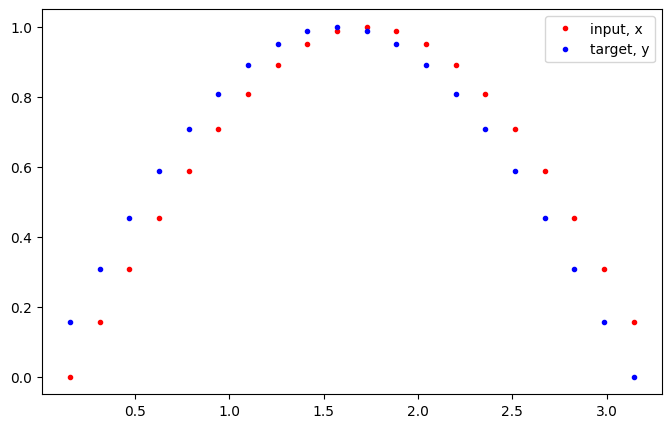

In [5]:
plt.figure(figsize=(8,5))

# how many time steps/data pts are in one batch of data
seq_length = 20

# generate evenly spaced data pts
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) # size becomes (seq_length+1, 1), adds an input_size dimension

x = data[:-1] # all but the last piece of data
y = data[1:] # all but the first

# display the data
plt.plot(time_steps[1:], x, 'r.', label='input, x') # x
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

---
## Шаг 2. Создадим класс RNN


Next, we define an RNN in PyTorch. We'll use `nn.RNN` to create an RNN layer, then we'll add a last, fully-connected layer to get the output size that we want. An RNN takes in a number of parameters:
* **input_size** - размер входных данных
* **hidden_dim** - количество признаков на выходе RNN и на скрытом состоянии
* **n_layers** - количество слоёв, которые состоявляют RNN (обычно 1-3, больше 1 означает, что вы используете stacked RNN
* **batch_first** - будет ли входное/выходное значение содержать размер батча (batch_size) на первом месте (batch_size, seq_length, hidden_dim)

[RNN documentation](https://pytorch.org/docs/stable/nn.html#rnn)

In [11]:
class RNN(torch.nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim
        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, batch_first=True)

        # last, fully-connected layer
        self.fc = torch.nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.shape[1]

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


### Шаг 3. Проверка размерностей выходных и выходных значений

In [12]:
# test that dimensions are as expected
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([1, 1, 10])


### Шаг 4. Тренировка RNN

In [13]:
# decide on hyperparameters
input_size=1
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=2)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


### Шаг 5. Задание функцции потерть и оптимизатора

Задача относится в ктипу регрессии: можем ли мы натренировать RNN, чтобы она чётко предсказывала следующую коодинату во времени, основываясь на текущей координате?


>* Функция потерь будет типичной для задачи регрессии: средняя квадратичная ошибка.
>* В качестве оптимизатора для рекуррентных моделей обычно используют Adam (зададим шаг обучения 0.01)

In [20]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr = 0.01)

### Шаг 6. Определим функцию для тренировки

Эта функция будет принимать в качестве параметров саму сеть (rnn), количество эпох обучения (n_steps), частоту вывода на экран значений функции потерь.

Выходом этой функции будет обученная RNN-модель.

Обратите внимание на работу со скрытым состоянием (hidden state):

* скрытое состояние инициализируется значением None перед заходом в цикл;
* после того как нейронная сеть сгенерирует последующее скрытое состояние, берётся предыдущее скрытое состояние и используется как входное значение для RNN на следующем шаге.

In [30]:
# train the RNN
def train(rnn, n_steps, print_every):

    # initialize the hidden state
    hidden = None

    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]

        # convert data into Tensors
        x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.tensor(x, dtype=torch.float32)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.detach()

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()

    return rnn


### Шаг 7. Запуск тренировки и вывод результатов

Loss:  0.4182172417640686


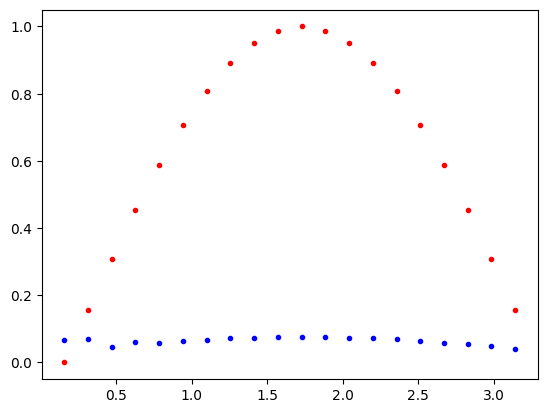

Loss:  0.028670161962509155


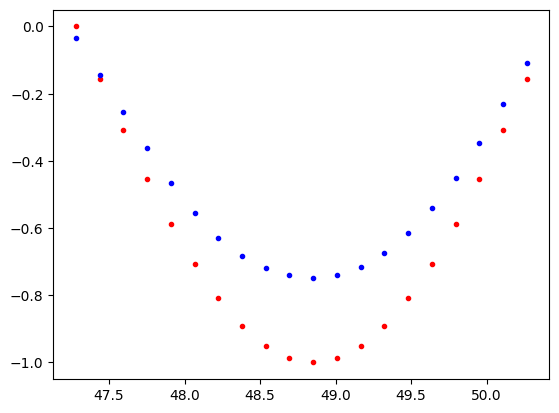

Loss:  0.002032265532761812


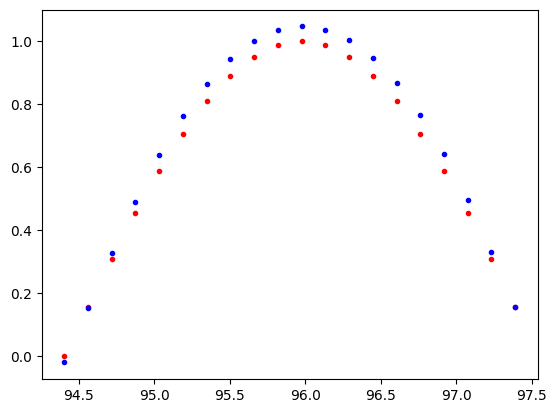

Loss:  0.0019766991026699543


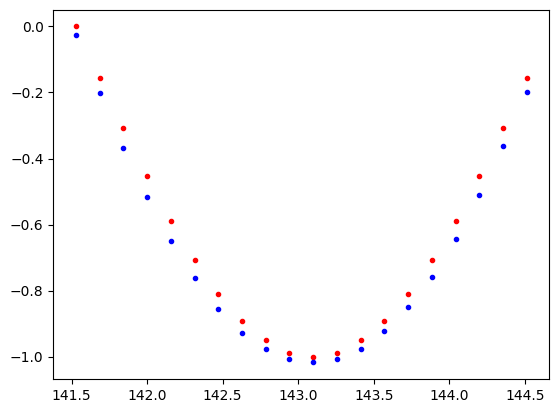

Loss:  0.00010271584324073046


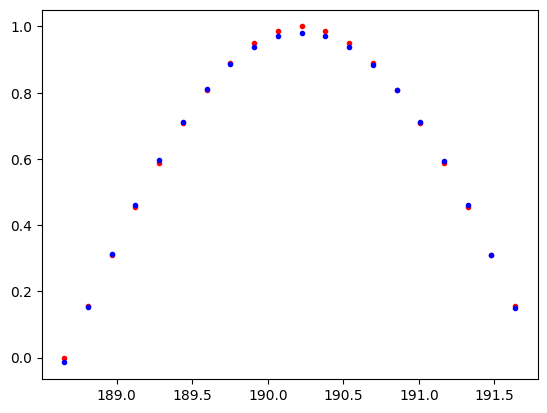

In [31]:
# train the rnn and monitor results
n_steps = 75
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)

# Пример прогнозирования временного ряда

---
- [How to Remove Non-Stationarity From Time Series](https://www.kaggle.com/code/bextuychiev/how-to-remove-non-stationarity-from-time-series)
- [A Guide to Time Series Forecasting in Python](https://builtin.com/data-science/time-series-forecasting-python)
- [How to Check if Time Series Data is Stationary with Python?](https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/)
- [Complete Guide on Time Series Analysis in Python](https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python)
- [Data transformations and forecasting models: what to use and when](https://people.duke.edu/~rnau/whatuse.htm)

Что общего у прогнозирования потребления электроэнергии домохозяйствами, оценки трафика на дорогах в определенные периоды, прогнозировании паводков и прогнозировании цены, по которой акции будут торговаться на фондовой бирже?

Все они попадают под понятие данных временных рядов! Вы не можете точно предсказать любой из этих результатов без компонента «время». И по мере того, как в мире вокруг нас генерируется все больше и больше данных, прогнозирование временных рядов становится все более важной областью применения методов ML и DL.



## Подготовка данных
[Time Series Prediction with LSTM Using PyTorch](https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb#scrollTo=NabsV8O5BBd5)


### Загрузка данных

Данные о количестве пассажиров за каждый месяц.
[Dataset Air Passengers Number of air passengers per month](https://www.kaggle.com/rakannimer/air-passengers)


In [53]:
import pandas as pd

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/airline-passengers.csv"
)
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


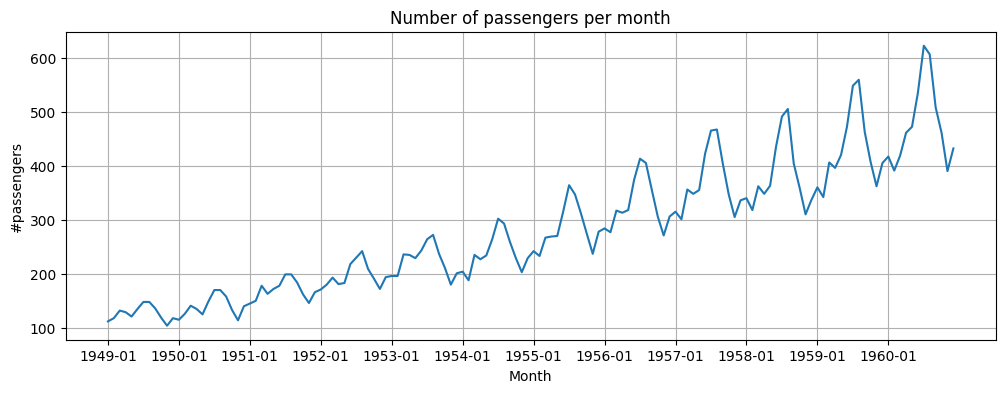

In [67]:
import matplotlib.pyplot as plt

training_data = dataset.iloc[:, 1:2].values  # transform dataframe to numpy.array
# plotting
plt.figure(figsize=(12, 4))
plt.plot(training_data, label="Airline Passangers Data")
plt.title("Number of passengers per month")
plt.ylabel("#passengers")
plt.xlabel("Month")
labels_to_display = [i for i in range(training_data.shape[0]) if i % 12 == 0]
plt.xticks(labels_to_display, dataset["Month"][labels_to_display])
plt.grid()
plt.show()

Обратите внимание на разбиение временного ряда на **train-val-test**.

Если мы поделим ряд на отрезки, точки склейки будут легко предсказываться либо предыдущим, либо средним значением по отрезку. Нужно предсказывать крупные отрезки ряда. И помнить о том, что перемешивать данные нельзя — есть "прошлое" и "будущее".


<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/fixed_partitioning.jpg" width="700">

<em>Source: <a href="https://yuting3656.github.io/yutingblog/coursera-tensorflow-developer-professional-certificate/sequences-time-series-and-prediction/week01-03">Coursera: Sequences, Time Series and Prediction with TensorFlow</a></em>

### Шкалирование данных

In [68]:
# Min-Max normalization
td_min = training_data.min()
td_max = training_data.max()
print("Initial statistics:")
print("Minimum value:", repr(td_min).rjust(5))
print("Maximum value:", repr(td_max).rjust(5))

training_data = (training_data - td_min) / (td_max - td_min)
print("\nResulting statistics:")
print("Minimum value:", repr(training_data.min()).rjust(5))
print("Maximum value:", repr(training_data.max()).rjust(5))

Initial statistics:
Minimum value:   104
Maximum value:   622

Resulting statistics:
Minimum value:   0.0
Maximum value:   1.0


### Формирование ансамблей данных

Поскольку мы хотим научиться предсказывать следующие значение на основе предыдущих, нам нужно подготовить данные соответствующим образом.

Разобьем весь массив данных на фрагменты вида

$x \to y$,

где $x$ — это подпоследовательность, например, записи с 1-й по 8-ю, а $y$ — это значение из 9-й записи, то самое, которое мы хотим предсказать.

In [69]:
import numpy as np
import torch

# create data "ensemble"


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i : (i + seq_length)]  # picking several sequential observations
        _y = data[i + seq_length]  # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))


# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 8  # compare 2 and 32
x, y = sliding_windows(training_data, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0154],
        [0.0270],
        [0.0541],
        [0.0483],
        [0.0328],
        [0.0598],
        [0.0849],
        [0.0849]])
Data corresponding to the first y:
tensor([0.0618])


Благодаря такому подходу мы можем работать с RNN моделью так же, как работали со сверточными моделями, подавая на вход такую подпоследовательность + результат.

### Разобьем на train и test

In [70]:
train_size = int(len(y) * 0.8)

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

print("Train data:")
print("x shape:", x_train.shape)
print("y shape:", y_train.shape)

print("\nTest data:")
print("x shape:", x_test.shape)
print("y shape:", y_test.shape)

Train data:
x shape: torch.Size([108, 8, 1])
y shape: torch.Size([108, 1])

Test data:
x shape: torch.Size([28, 8, 1])
y shape: torch.Size([28, 1])


## Создание и обучение модели

Обратите внимание на параметр **batch_first**. Он позволяет записывать данные в привычном формате.

In [73]:
import torch.nn as nn


class AirTrafficPredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        # hidden_size == number of neurons
        super().__init__()
        self.rnn = nn.RNN(
            input_size, hidden_size, batch_first=True
        )
        self.fc = torch.nn.Linear(hidden_size, 1)  # Predict only one value

    def forward(self, x):
        # print("x: ",x.shape) # 108 x 8 x 1 : [batch_size, seq_len, input_size]
        out, h = self.rnn(x)
        # print("out: ", out.shape) # 108 x 8 x 4 : [batch_size, seq_len, hidden_size] Useless!
        # print("h : ", h.shape) # 1 x 108 x 4 [ num_layers, batch_size, hidden_size]
        y = self.fc(h)
        # print("y",y.shape) # 1 x 108 x 1
        return y, h

### Обучение

Благодаря подготовке данных процесс обучения не будет отличаться от того, что мы использовали на прошедших занятиях.

В силу того, что датасет маленький и все данные поместились в один batch, итерирования по batch-ам в явном виде здесь не происходит.

In [74]:
def time_series_train(model, num_epochs=2000, learning_rate=0.01):
    criterion = torch.nn.MSELoss()  # mean-squared error for regression
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

    # Train the model
    for epoch in range(num_epochs):
        y_pred, h = model(x_train)  # we don't use h there, but we can!
        optimizer.zero_grad()

        # obtain the loss
        loss = criterion(y_pred[0], y_train)  # for shape compatibility
        loss.backward()
        optimizer.step()

        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))


print("Simple RNN training process with MSE loss:")
input_size = 1
hidden_size = 4
rnn = AirTrafficPredictor(input_size, hidden_size)
time_series_train(rnn)

Simple RNN training process with MSE loss:
Epoch: 0,       loss: 0.12236
Epoch: 100,     loss: 0.00380
Epoch: 200,     loss: 0.00274
Epoch: 300,     loss: 0.00258
Epoch: 400,     loss: 0.00265
Epoch: 500,     loss: 0.00225
Epoch: 600,     loss: 0.00220
Epoch: 700,     loss: 0.00226
Epoch: 800,     loss: 0.00234
Epoch: 900,     loss: 0.00197
Epoch: 1000,    loss: 0.00212
Epoch: 1100,    loss: 0.00208
Epoch: 1200,    loss: 0.00223
Epoch: 1300,    loss: 0.00202
Epoch: 1400,    loss: 0.00211
Epoch: 1500,    loss: 0.00194
Epoch: 1600,    loss: 0.00193
Epoch: 1700,    loss: 0.00180
Epoch: 1800,    loss: 0.00230
Epoch: 1900,    loss: 0.00180


### Тестирование

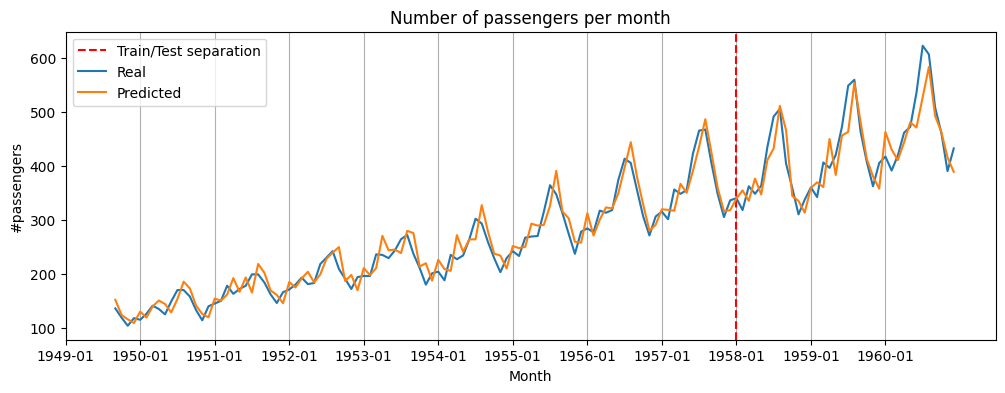

In [75]:
def time_series_plot(train_predict):
    data_predict = train_predict.data
    y_data_plot = y.data

    # Denormalize
    data_predict = data_predict[0] * (td_max - td_min) + td_min
    y_data_plot = y_data_plot * (td_max - td_min) + td_min

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.axvline(x=train_size, c="r", linestyle="--")
    # shifting the curve as first y-value not correspond first value overall
    plt.plot(seq_length + np.arange(y_data_plot.shape[0]), y_data_plot)
    plt.plot(seq_length + np.arange(y_data_plot.shape[0]), data_predict)

    plt.title("Number of passengers per month")
    plt.ylabel("#passengers")
    plt.xlabel("Month")
    plt.xticks(labels_to_display, dataset["Month"][labels_to_display])

    plt.legend(["Train/Test separation", "Real", "Predicted"])
    plt.grid(axis="x")
    plt.show()


rnn.eval()
train_predict, h = rnn(x)
time_series_plot(train_predict)

Видим, что модель в принципе справляется с задачей. Если подбирать размер hidden size, качество станет лучше. Или мы добьёмся того, что нейросеть будет предсказывать просто линию (большой hidden size — нейросеть выучивает, что нужно предсказывать следующее значение по предыщущему).

Но посмотрим, как далее справятся более мощные архитектуры, и уже позднее напишем окончательные выводы.



### Проблемы RNN

Теоретически, можно было бы сразу пропустить все данные через сеть и затем вычислить градиент, однако возникнут следующие проблемы:

 - большие последовательности не поместятся в памяти;
 - так как цепочка будет очень длинной, возникнет затухание/взрыв градиента;
 - по мере прохождения сигнала по цепи контекст затирается.


Допустим, у нас есть длинная последовательность. Если мы сразу предсказываем, то в каждый момент времени нужно распространить Loss. И все ячейки нужно обновить во время backpropogation. Все градиенты нужно посчитать. Возникают проблемы, связанные с нехваткой памяти.

Есть специальные тесты для проверки, контекст какой длины использует RNN при предсказании. Если мы делаем предсказание только в последней ячейке, может оказаться, что используется, скажем, информация только о последних 10 словах предложения.

Функция активации Tanh постепенно затирает контекст.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/backprop_through_time.png"><center>

<center><em>Source: <a href="http://cs231n.stanford.edu/slides/2021/lecture_10.pdf">CS231n: Recurrent Neural Network</a></em></center>

Затухающий/взрывающийся градиент (Vanishing/exploding gradient) — явления затухающего и взрывающегося градиента часто встречаются в контексте RNN. И при большой длине последовательности это становится критичным. Причина в том, что зависимость величины градиента от числа слоёв экспоненциальная, поскольку веса умножаются многократно.

$dL ∝ (W)^N$.

$W > 1$ => взрыв

$W < 1$ => затухание

<img src ="http://edunet.kea.su/repo/EduNet-content/L08/out/simple_rnn_backprop.png">

Один из путей решения проблемы: **градиентное отсечение** (Gradient clipping) — метод, который ограничивает максимально допустимое значение градиента, позволяя избежать градиентного взрыва.

А от затухания градиента может помочь **пропускание** **градиента по частям**, на сколько-то шагов по времени назад или вперёд. А не через всю нейросеть. Да, градиент будет не совсем точо считаться, и мы будем терять в качестве. И это нам спасает память.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/truncated_backprop.png"></center>

<center><em>Source: <a href="http://cs231n.stanford.edu/slides/2021/lecture_10.pdf">CS231n: Recurrent Neural Network</a></em></center>